In [4]:
# Set CWD to the location of the data.
setwd('C:/Users/rhouldin/Documents/Courses/2015-09 Data Science at Scale/2015-09 Data Manipulation at Scale/datasci_course_materials/assignment6')


In [16]:
# Load the plotting library.
library(ggplot2)

In [17]:
# Load the San Francisco Incidents data.
sf1 = read.csv('sanfrancisco_incidents_summer_2014.csv',stringsAsFactors = FALSE)

In [21]:
# Combine the Date and Time strings and convert to the R Date type.
sf1$DateTimeStr <- paste( sf1$Date, sf1$Time)
sf1$DateTime = strptime(sf1$DateTimeStr, format="%m/%d/%Y %H:%M")

# Extract the Hour, for analysis by hour.
sf1$Hour = sf1$DateTime$hour


In [22]:
# Convert categorical columns to factors.
sf1$DayOfWeek <- as.factor(sf1$DayOfWeek)
sf1$Category <- as.factor(sf1$Category)
sf1$Descript <- as.factor(sf1$Descript)
sf1$PdDistrict <- as.factor(sf1$PdDistrict)
sf1$Resolution <- as.factor(sf1$Resolution)


In [23]:
# Generate a data frame of Incident Counts by Day Of Week.
WeekdayCounts = as.data.frame(table(sf1$DayOfWeek))

# Add an ordinal variable that will be used to present Day of Week in the usual order.
WeekdayCounts$Var1 = factor(WeekdayCounts$Var1, ordered=TRUE, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday"))


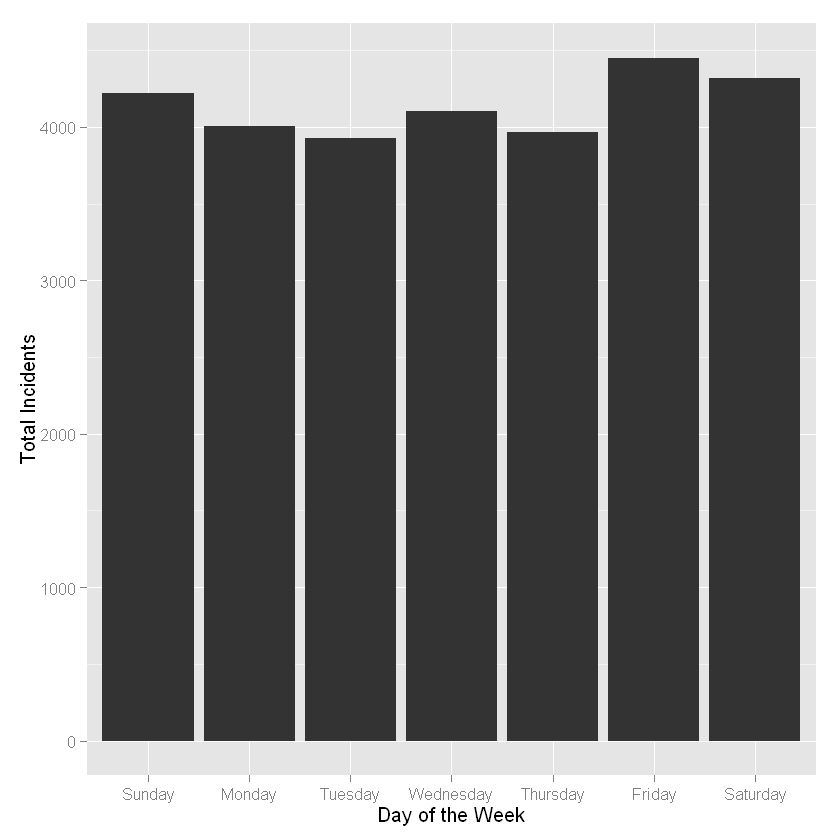

In [25]:
# Generate a simple histogram of Incident Counts by Day Of Week.
ggplot(WeekdayCounts, aes(x=factor(Var1), y=Freq)) + geom_bar(stat="identity") + xlab("Day of the Week") + ylab("Total Incidents")


In [26]:
# Start generating an alternate plot that includes the Hour of the Incidents.

# Stacked line chart of Count vs Hour,
# with a separate line for each day of week.

#table(sf1$DayOfWeek, sf1$Hour)

# Generate a table of Counts by Day Of Week and Hour, and save to a data frame:
DayHourCounts = as.data.frame(table(sf1$DayOfWeek, sf1$Hour))

#str(DayHourCounts)

# The Hour is in the auto-generated "Var2".
# Convert it to a new numeric column names "Hour".
DayHourCounts$Hour = as.numeric(as.character(DayHourCounts$Var2))


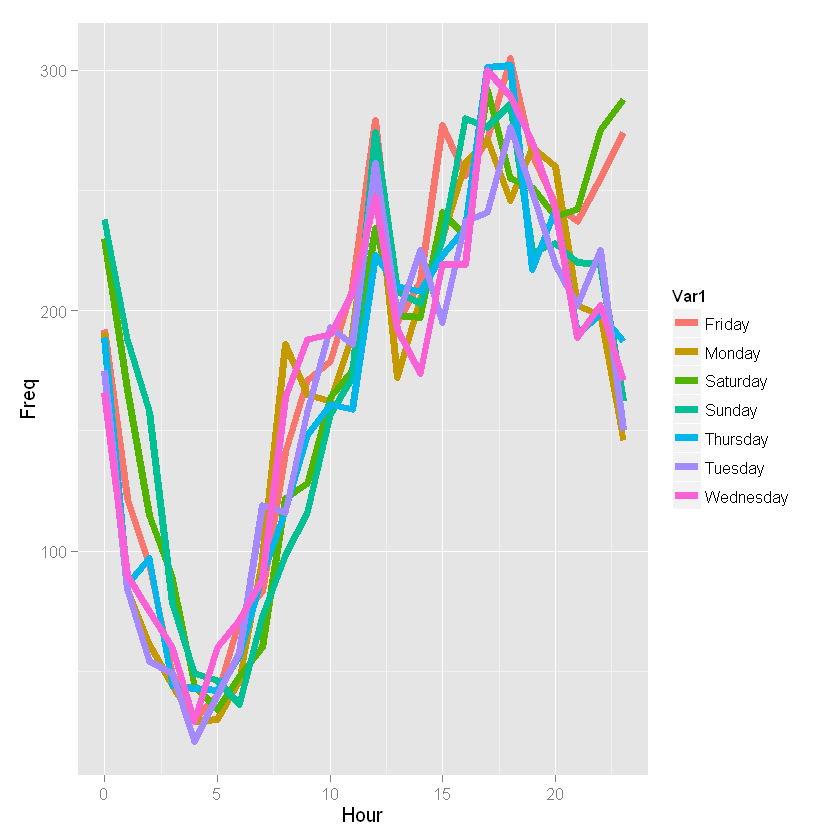

In [27]:
# Generate a stacked line chart of Incident Count vs. Hour, with one line per Day Of Week.
ggplot(DayHourCounts, aes(x=Hour, y=Freq)) + geom_line(aes(group=Var1, color=Var1), size=2)


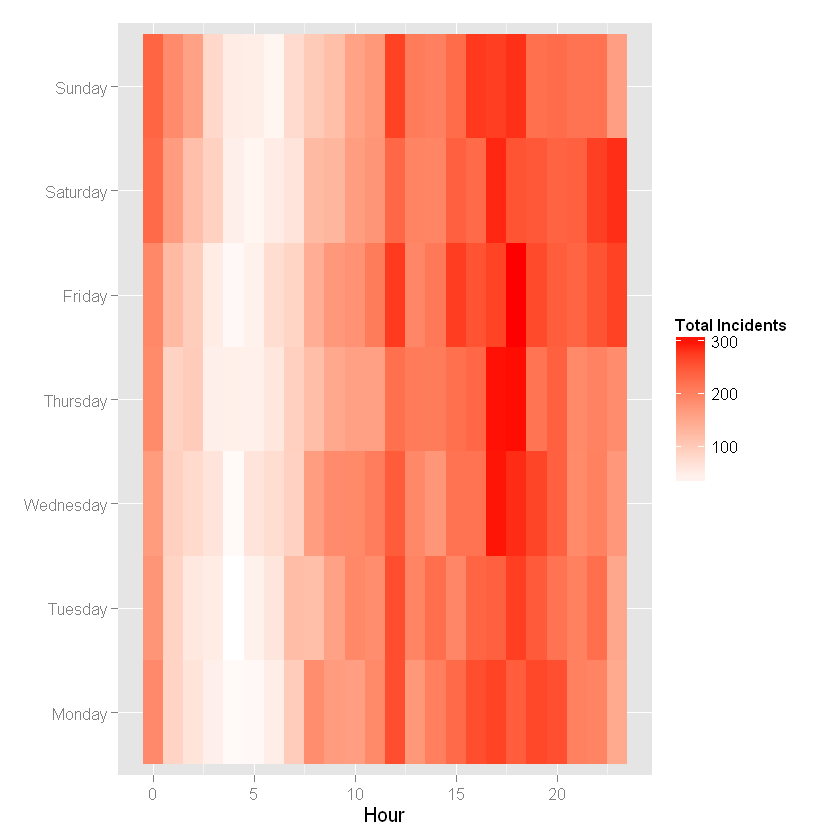

In [28]:
# Start generating a heatmap of Day Of Week vs. Hour, with the intensity being
# derived from the Incident Count.

# Set the Day Of Week to display in the usual order.
DayHourCounts$Var1 = factor(DayHourCounts$Var1, ordered=TRUE, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

# Generate the heatmap.
ggplot(DayHourCounts, aes(x = Hour, y = Var1)) + geom_tile(aes(fill = Freq)) + scale_fill_gradient(name="Total Incidents", low="white", high="red") + theme(axis.title.y = element_blank())

